# Proyek Analisis Data: Bike Sharing
- **Nama:** Gede Satyamahinsa Prastita Uttama
- **Email:** satyamahinsaa.pu@gmail.com
- **ID Dicoding:** satyamahinsaa

## Menentukan Pertanyaan Bisnis

1. Bagaimana hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?
2. Pada musim (season) apa jumlah pengguna sepeda (cnt) paling banyak?
3. Bagaimana cuaca (weathersit) mampu mempengaruhi penggunaan jumlah pengguna sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import ibrary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv("datasets/day.csv")
df_hour = pd.read_csv("datasets/hour.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Data Type Checking

In [6]:
print('Dataframe day:')
print(df_day.info())

print("\n")

print('Dataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

Berdasarkan hasil pengecekan di atas, df_day dan df_hour memiliki kesalahan jenis data pada kolom dteday. Pada awalnya, dteday memiliki tipe data object, tetapi seharusnya memiliki tipe data datetime.

#### Missing Value Checking

In [7]:
print('Dataframe day:')
print(df_day.isna().sum())

print("\n")

print('Dataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil pengecekan di atas, df_day dan df_hour tidak memiliki nilai yang hilang atau kosong.

#### Duplicate Data Checking

In [8]:
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Berdasarkan hasil pengecekan di atas, df_day dan df_hour tidak memiliki data yang sama atau duplicate.

#### Descriptive Statistics

Dataset df_day

In [9]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil yang didapat pada Dataset day:

- Jumlah data keseluruhan: 731 entri.
- Musim (season) paling umum: Musim panas (season 2).
- Tahun (yr) yang dominan: 2012 (yr = 1).
- Bulan (mnth) yang paling sering muncul: Juli (mnth 7).
- Hari libur (holiday) hanya ada sekitar 2.87% dari total hari.
- Hari dalam seminggu (weekday) yang paling sering muncul: hari ke-3.
- Hari kerja (workingday) adalah mayoritas (sekitar 68.4%). 
- Rata-rata cuaca (weathersit) pada keadaan yang baik (weathersit 1).
- Rata-rata suhu (temp) adalah sekitar 0.50.
- Rata-rata suhu perasaan (atemp) adalah sekitar 0.48.
- Rata-rata kelembaban (hum) sekitar 0.47 (47%).
- Rata-rata kecepatan angin (windspeed) adalah sekitar 0.63 (67% dari maksimal).
- Rata-rata jumlah pengguna casual (casual) sekitar 848.
- Rata-rata jumlah pengguna terdaftar (registered) sekitar 3656.
- Rata-rata total rental (cnt) sekitar 4504 per hari.

Dataset df_hour

In [10]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil yang didapat pada Dataset hour:

- Jumlah data keseluruhan: 17379 entri.
- Musim (season) paling umum: Musim panas (season 2).
- Tahun (yr) yang dominan: 2012 (yr = 1).
- Bulan (mnth) yang paling sering muncul: Juli (mnth 7).
- Jam (hr) yang paling sering muncul: 12 siang.
- Hari libur (holiday) hanya ada sekitar 2.87% dari total hari.
- Hari dalam seminggu (weekday) yang paling sering muncul: hari ke-3.
- Hari kerja (workingday) adalah mayoritas (sekitar 68.2%). 
- Rata-rata cuaca (weathersit) pada keadaan yang baik (weathersit 1).
- Rata-rata suhu (temp) adalah sekitar 0.50.
- Rata-rata suhu perasaan (atemp) adalah sekitar 0.48.
- Rata-rata kelembaban (hum) sekitar 0.63 (63%).
- Rata-rata kecepatan angin (windspeed) adalah sekitar 0.19 (67% dari maksimal).
- Rata-rata jumlah pengguna casual (casual) sekitar 36.
- Rata-rata jumlah pengguna terdaftar (registered) sekitar 154.
- Rata-rata total rental (cnt) sekitar 189 per jam.

### Cleaning Data

#### Data Type Fixes

In [11]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [12]:
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


Tipe data dteday sudah menjadi datetime

## Exploratory Data Analysis (EDA)

#### Korelasi antara variabel numerik

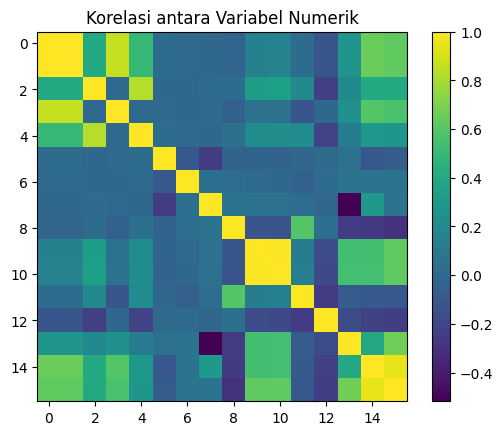

In [13]:
warnings.filterwarnings("ignore")

correlation_matrix = df_day.corr()
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.title("Korelasi antara Variabel Numerik")
plt.colorbar()
plt.show()

#### Distribusi Variabel Numerik

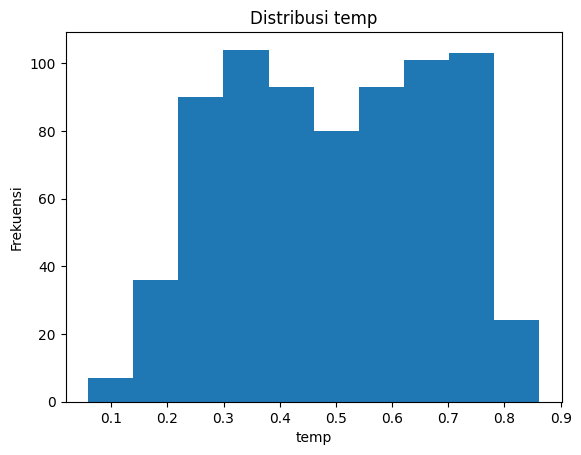

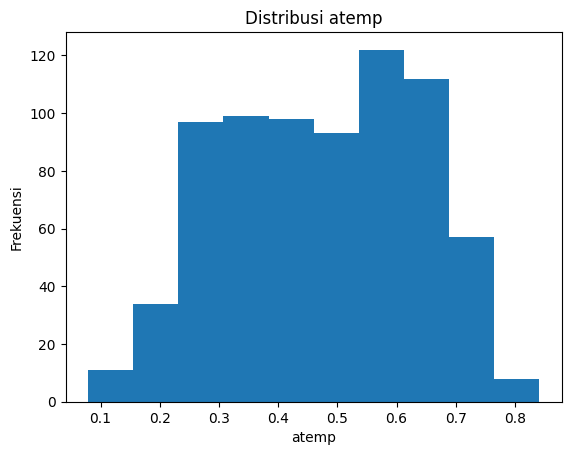

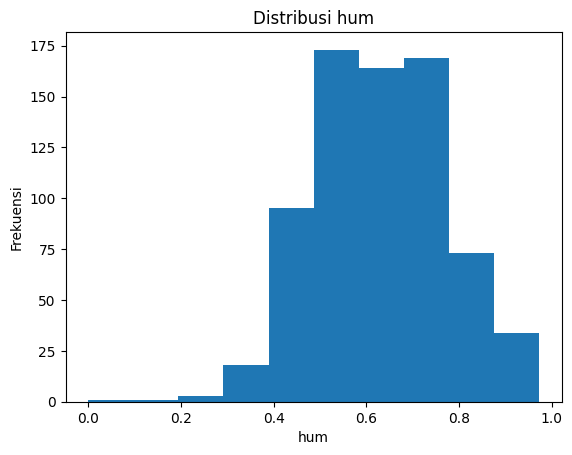

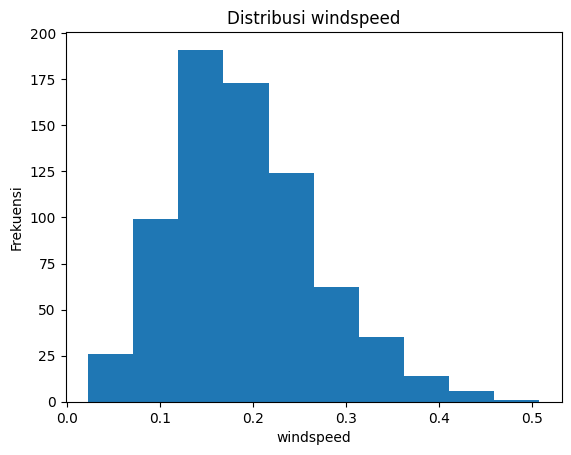

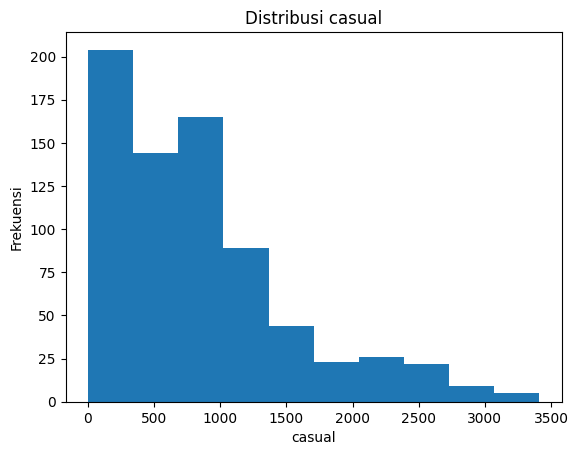

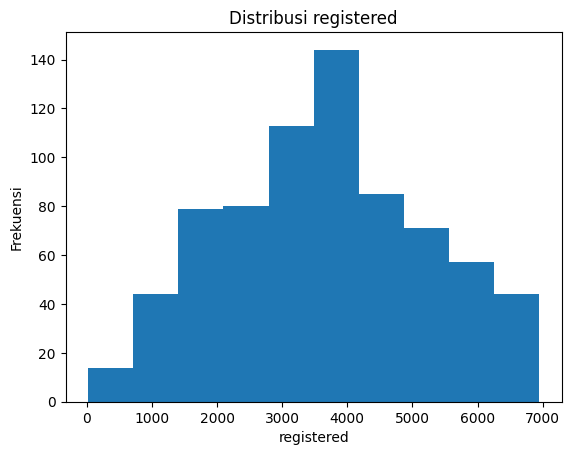

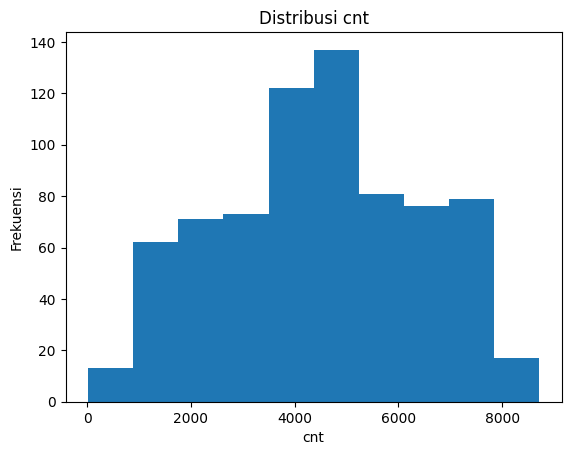

In [14]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    plt.hist(df_day[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

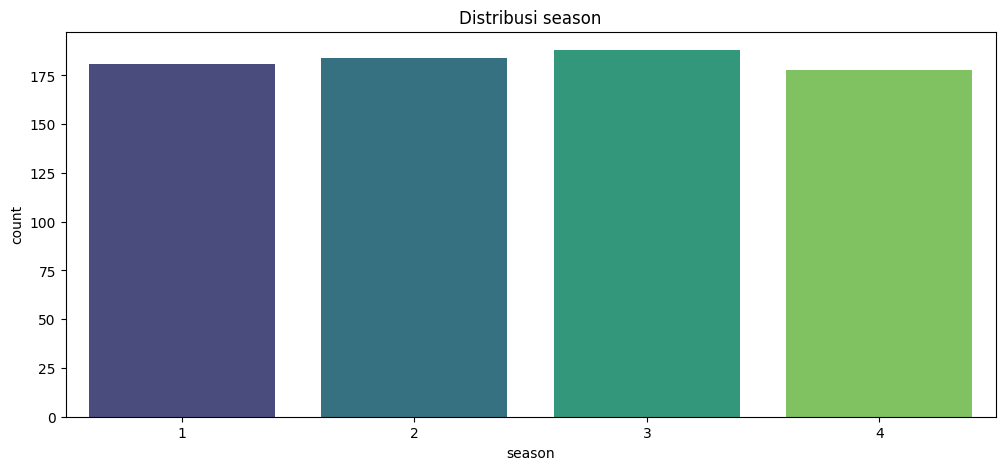

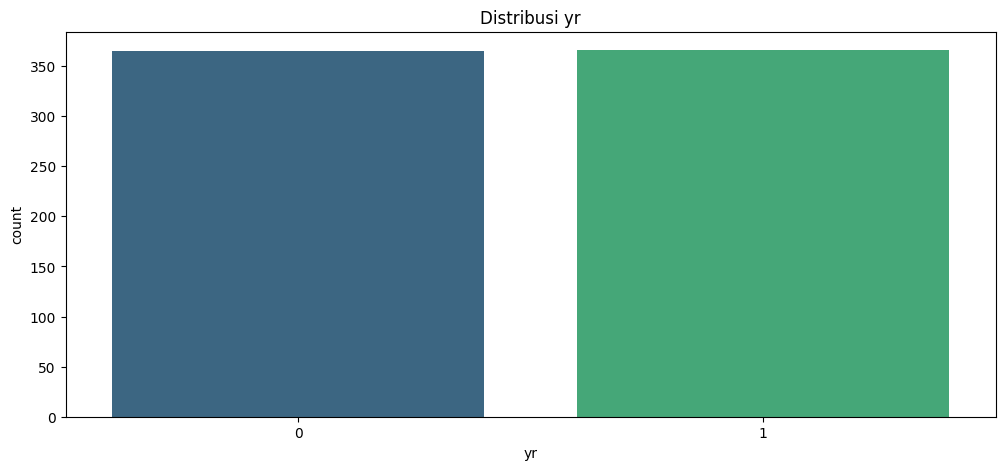

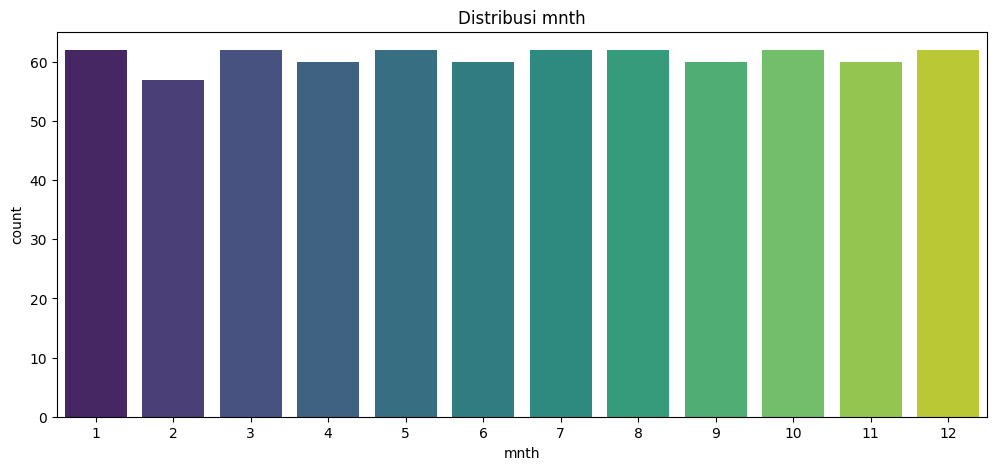

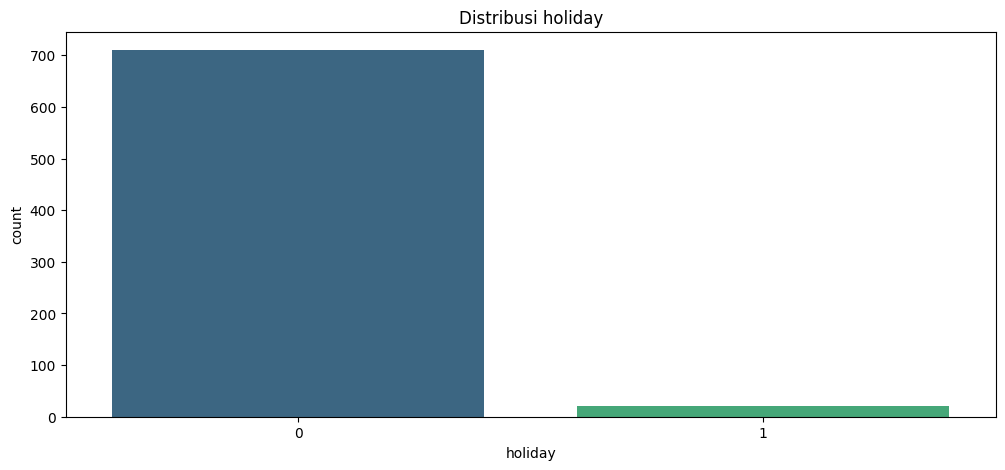

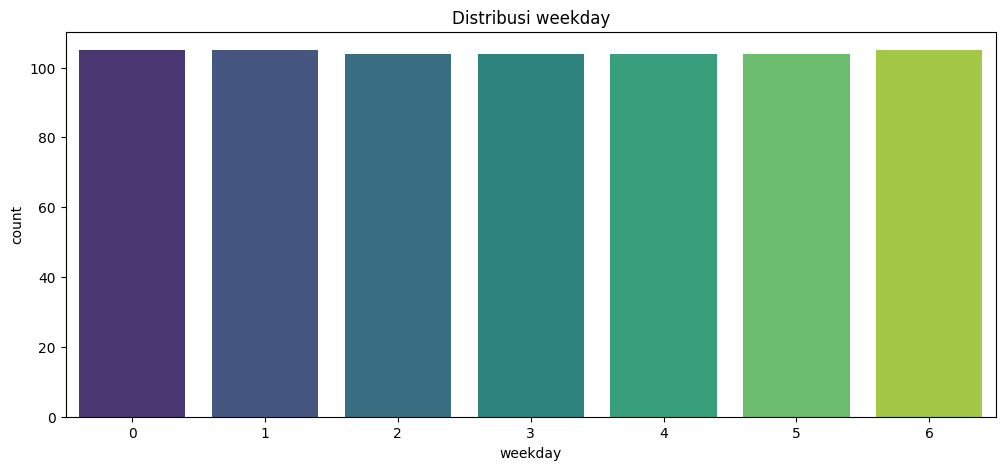

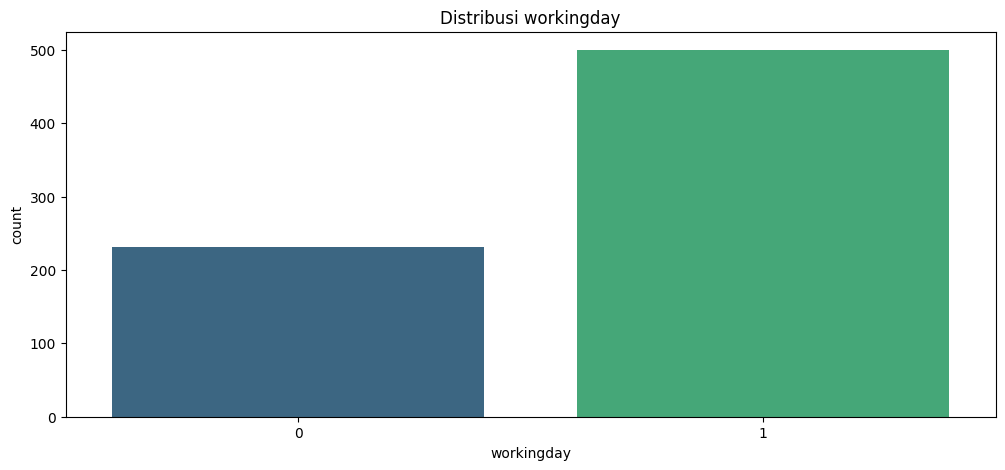

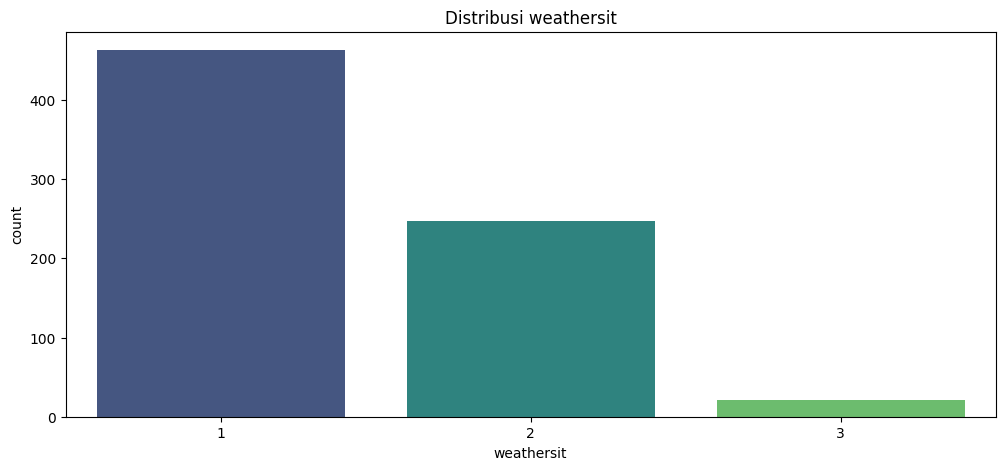

In [15]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=col, data=df_day, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.show()

#### Hubungan antara Hari Libur (holiday) dan Jumlah Sewa (cnt)

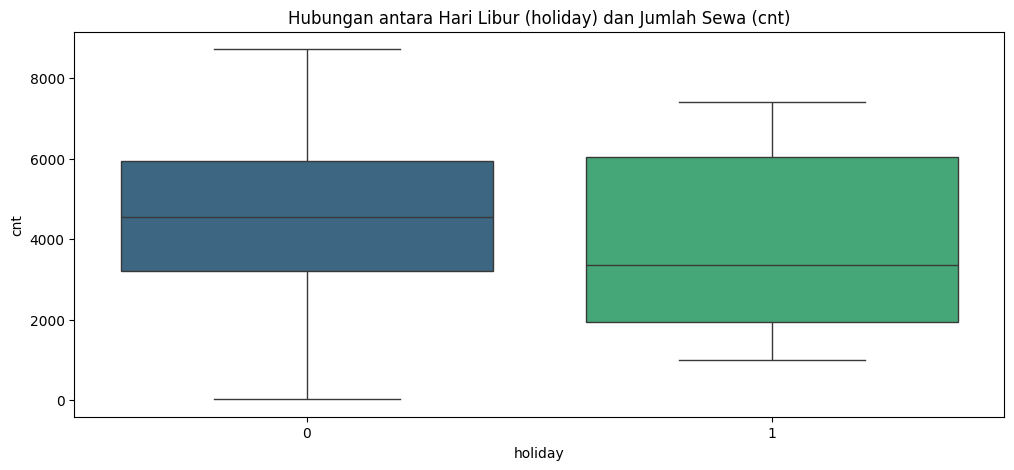

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='holiday', y='cnt', data=df_day, palette='viridis')
plt.title('Hubungan antara Hari Libur (holiday) dan Jumlah Sewa (cnt)')
plt.show()

#### Hubungan antara Cuaca (weathersit) dan Jumlah Sewa (cnt)

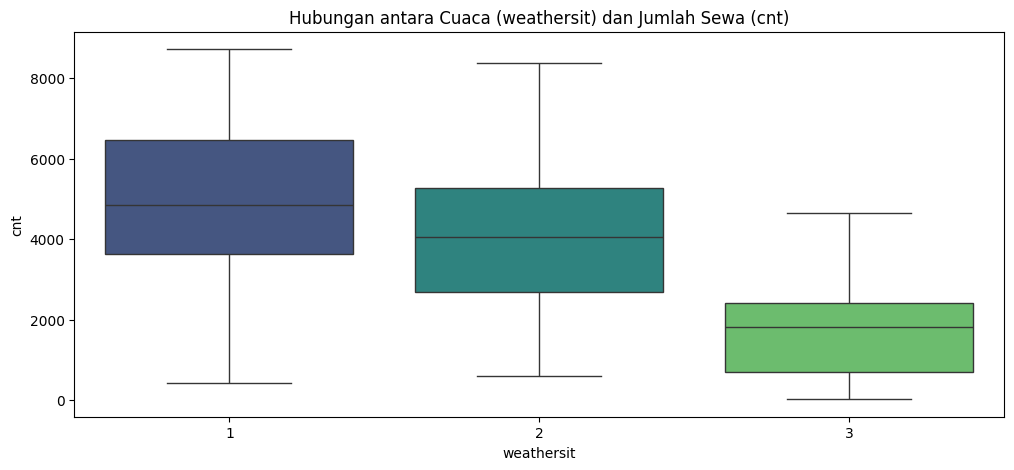

In [17]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='weathersit', y='cnt', data=df_day, palette='viridis')
plt.title('Hubungan antara Cuaca (weathersit) dan Jumlah Sewa (cnt)')
plt.show()

#### Hubungan antara Suhu (temp) dan Jumlah Sewa (cnt)

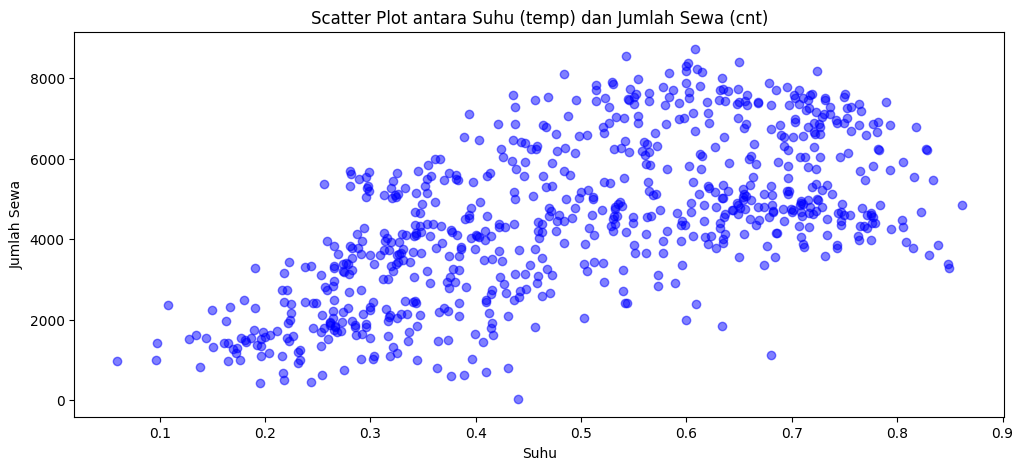

In [18]:
plt.figure(figsize=(12, 5))
plt.scatter(x=df_day['temp'], y=df_day['cnt'], c='blue', alpha=0.5)
plt.title('Scatter Plot antara Suhu (temp) dan Jumlah Sewa (cnt)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa')
plt.show()

## Visualization & Explanatory Analysis

#### Pertanyaan 1:

Bagaimana hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?

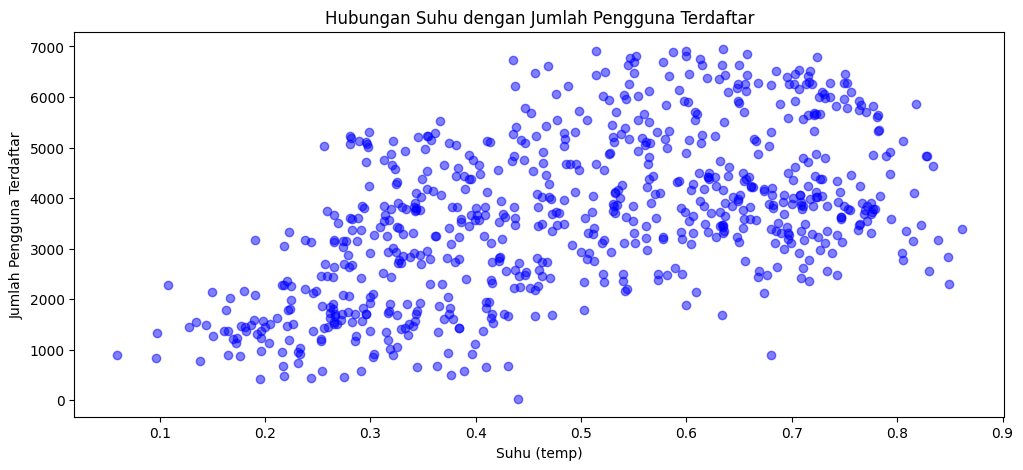

In [19]:
plt.figure(figsize=(12, 5))
plt.scatter(df_day['temp'], df_day['registered'], c='blue', alpha=0.5)
plt.title('Hubungan Suhu dengan Jumlah Pengguna Terdaftar')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

Insight yang didapat dari grafik di atas adalah terlihat adanya korelasi positif yang menunjukkan bahwa meningkatnya suhu (temp) berpengaruh terhadap meningkatnya jumlah pengguna yang terdaftar.

#### Pertanyaan 2:

Pada musim (season) apa jumlah pengguna sepeda (cnt) paling banyak?

In [20]:
seasonly_users_df = df_day.groupby("season").agg({
    "cnt": "sum"
}).reset_index()

seasonly_users_df.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


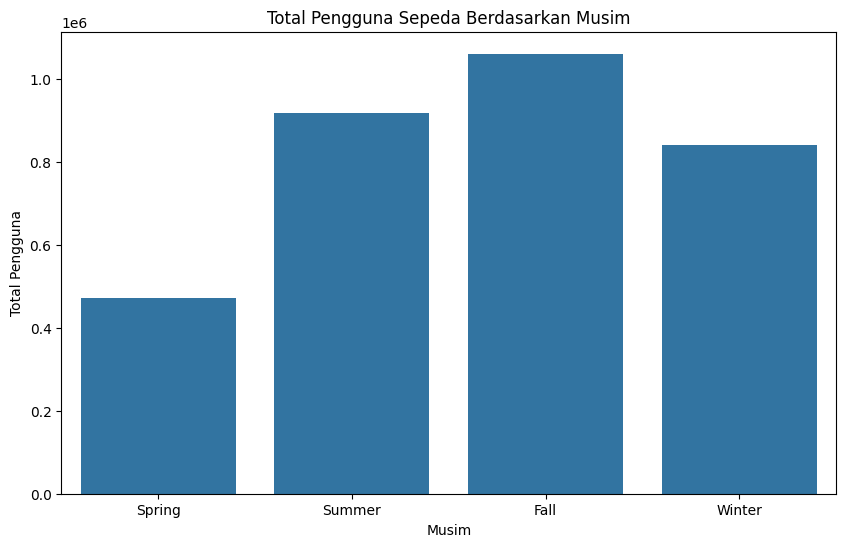

In [21]:
plt.figure(figsize=(10, 6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df)

plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Total Pengguna")
plt.title("Total Pengguna Sepeda Berdasarkan Musim")

plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa banyak pengguna sepeda yang menggunakannya pada musim gugur (Fall)

#### Pertanyaan 3:

Bagaimana cuaca (weathersit) mampu mempengaruhi penggunaan jumlah pengguna sepeda (cnt)?

Arti setiap nilai di dalam variabel weathersit:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [22]:
weatherly_users_df = df_day.groupby("weathersit").agg({
    "cnt": "sum"
}).reset_index()

all_seasons = pd.DataFrame({"weathersit": [1, 2, 3, 4]})
weatherly_users_df = all_seasons.merge(weatherly_users_df, on="weathersit", how="left").fillna(0)
weatherly_users_df['cnt'] = weatherly_users_df['cnt'].astype(int)

weatherly_users_df

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869
3,4,0


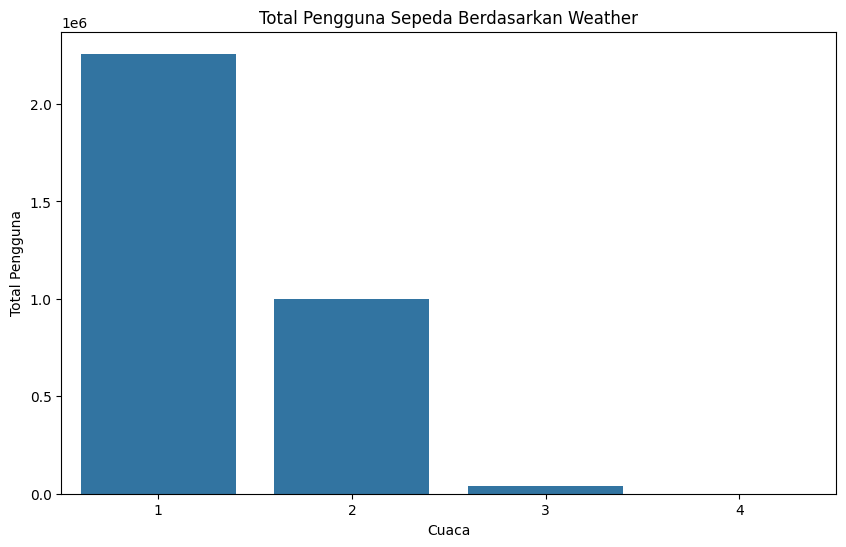

In [23]:
plt.figure(figsize=(10, 6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df)

plt.xlabel("Cuaca")
plt.ylabel("Total Pengguna")
plt.title("Total Pengguna Sepeda Berdasarkan Weather")

plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa banyak pengguna menggunakan sepeda pada cuaca cerah, sedikit berawan, dan sebagian berawan (nilai 1)

## Conclusion

1. Hubungan antara suhu dan jumlah pengguna terdaftar pada penyewaan sepeda menunjukkan bahwa suhu memengaruhi minat bersepeda. Hal ini sesuai dengan peningkatan suhu yang cenderung meningkatkan jumlah pengguna untuk menyewa sepeda.
2. Jumlah penyewa sepeda paling banyak selama musim gugur (Fall) dan paling sedikit selama musim semi (Spring).
3. Jumlah penyewa sepeda secara signifikan lebih tinggi saat cuaca cerah daripada saat cuaca ekstrem.

### Teknik Analisis Lanjutan

#### RFM analysis (Recency, Frequency, Monetary)

In [27]:
# Menghitung rfm
current_date = max(df_hour['dteday'])
rfm_df = df_hour.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days, 
    'instant': 'count',
    'cnt': 'sum'
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
rfm_df.head()

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


RFM analysis digunakan untuk memahami perilaku pelanggan terhadap bisnis Bike Sharing berdasarkan 3 faktor utama, yaitu Recency (seberapa baru pelanggan berinteraksi dengan Bike Sharing), Frequency (seberapa sering pelanggan memakai Bike Sharing), dan Monetary (seberapa banyak uang yang pelanggan habiskan untuk Bike Sharing).